# Partie 1 : Chargement d'un dataset simple (Iris)

Pour commencer, nous allons utiliser un dataset classique - le dataset Iris. 
Ce dataset contient des mesures de fleurs d'iris et leur espèce correspondante.

Le dataset Iris est idéal pour débuter car :
- Il est petit et facile à comprendre
- Il est propre (pas de valeurs manquantes)
- Il contient à la fois des caractéristiques numériques et une cible catégorielle
"""

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Chargement du dataset Iris
iris = load_iris()

# Conversion en DataFrame pandas pour une meilleure visualisation
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].apply(lambda x: iris.target_names[x])

# Affichage des 5 premières lignes
print("Aperçu du dataset Iris:")
display(iris_df.head())

Aperçu du dataset Iris:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


"""
# Partie 2 : Visualisation de base avec Pandas/Matplotlib (Hassib ;) )

Maintenant que nous avons chargé nos données, visualisons-les pour mieux comprendre leur distribution.
"""

In [ ]:
# importation de matplotlib
import matplotlib.pyplot as plt

# Pandas

Comme vu précédemment, Pandas est utilisé pour jouer les dataframes : des genres de tableau étant le source de notre jeu de données.

L'avantage des dataFrames, c'est qu'on peut les manipuler pour en tirer quelque informations et même faire des graphiques (voir en bas)

In [ ]:
# donne quelques informations générale sur le data set utilisé
iris_df.info()

# Savoir combien de dimension en tout
print(f'nombre de dimension : {iris_df.ndim}')

## on lui donne la colonne à comparer et on lui donne si c'est croissant ou décroissant (dans ce cas True = croissant)
iris_df = iris_df.sort_values('sepal length (cm)', ascending=True)

# On a change les indexes de place pour respecter le trie. Pour revenir comme on était, on peut trier selon l'indexe
iris_df = iris_df.sort_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
nombre de dimension : 2


In [ ]:
# on ne peut que garder certaines partie du dataframe en ajoutant une condition
iris_df_modif = iris_df[iris_df['petal length (cm)'] > 6]
print(iris_df_modif)

#on ne pourrait qu'avoir envie seulement 2 colonnes au lieu de toute le tableau
# le a:b veut dire que tu énumère tous les entiers entre a et b inclus
iris_df_modif = iris_df_modif.loc[105:131, ['sepal length (cm)','sepal width (cm)']]
print(iris_df_modif)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
105                7.6               3.0                6.6               2.1   
107                7.3               2.9                6.3               1.8   
109                7.2               3.6                6.1               2.5   
117                7.7               3.8                6.7               2.2   
118                7.7               2.6                6.9               2.3   
122                7.7               2.8                6.7               2.0   
130                7.4               2.8                6.1               1.9   
131                7.9               3.8                6.4               2.0   
135                7.7               3.0                6.1               2.3   

     target    species  
105       2  virginica  
107       2  virginica  
109       2  virginica  
117       2  virginica  
118       2  virginica  
122       2  virginica  
130       2  v

In [ ]:
# Imaginons que nous voulons la moyenne et l'écart-type d'une des colonnes
print(f'Moyenne de petal length : {iris_df['petal length (cm)'].mean()}')
print(f'Écart-type de petal length : {iris_df['petal length (cm)'].std()}')

Moyenne de petal length : 3.7580000000000005
Écart-type de petal length : 1.7652982332594662


# Matplolib

Pour aller plus loin, le dataframe peut être utilisé comme argument d'une des fonctions de matplotlib pour réaliser des graphiques

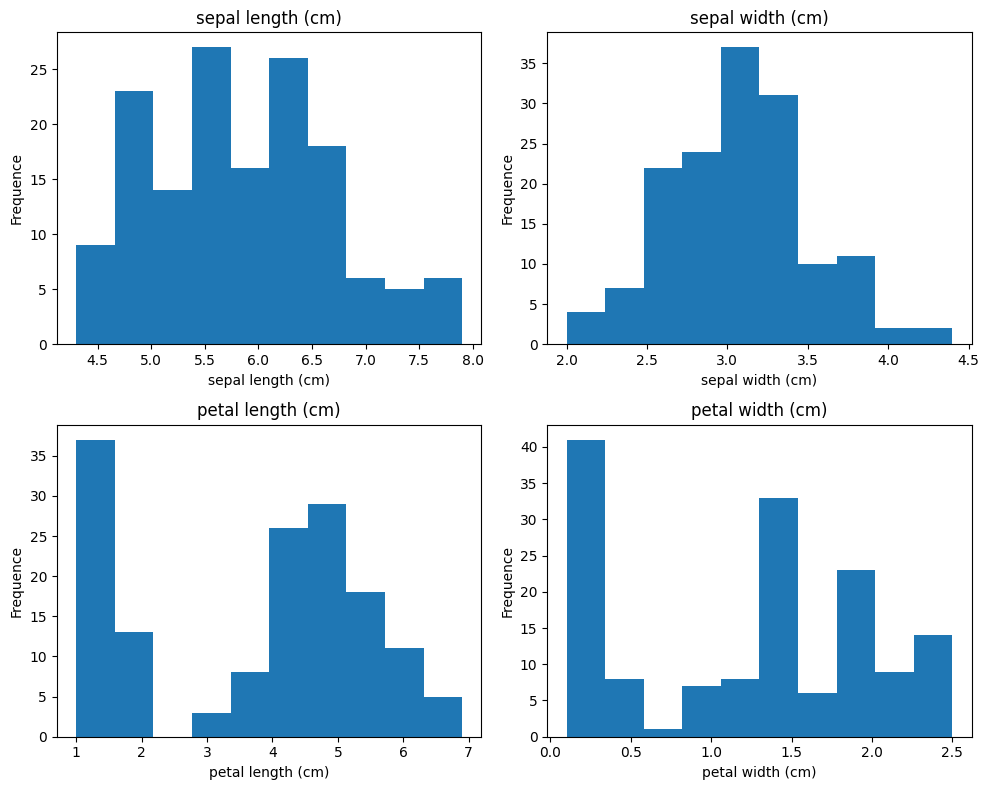

In [ ]:
# Utilisation de box-plot pour comparer les quartiles, moyenne et écart-type
# crée les sous graphiques de taille 2 par 2 avec une taille de 10 par 8
fig, axes = plt.subplots(2, 2, figsize=(10,8))
# axes lorsque tu fais   fig, axes = plt.subplots(2, 2, figsize=(10,8))
# [[axes[0,0], axes[0,1]],
#  [axes[1,0], axes[1,1]]]

# axes avec .flatten()
# [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]
axes = axes.flatten()

# zip c'est pour regrouper sous forme de tupple axes et nom de caractérisques  (sepal length , width ...)
for ax, col in zip(axes, iris.feature_names):

    ax.hist(iris_df[col])
    # configuration du titre et des axes
    ax.set_title(col)
    ax.set_ylabel('Frequence')
    ax.set_xlabel(col)

# paramètre d'afichage (un genre de zoom)
plt.tight_layout()
# affichage
plt.show()


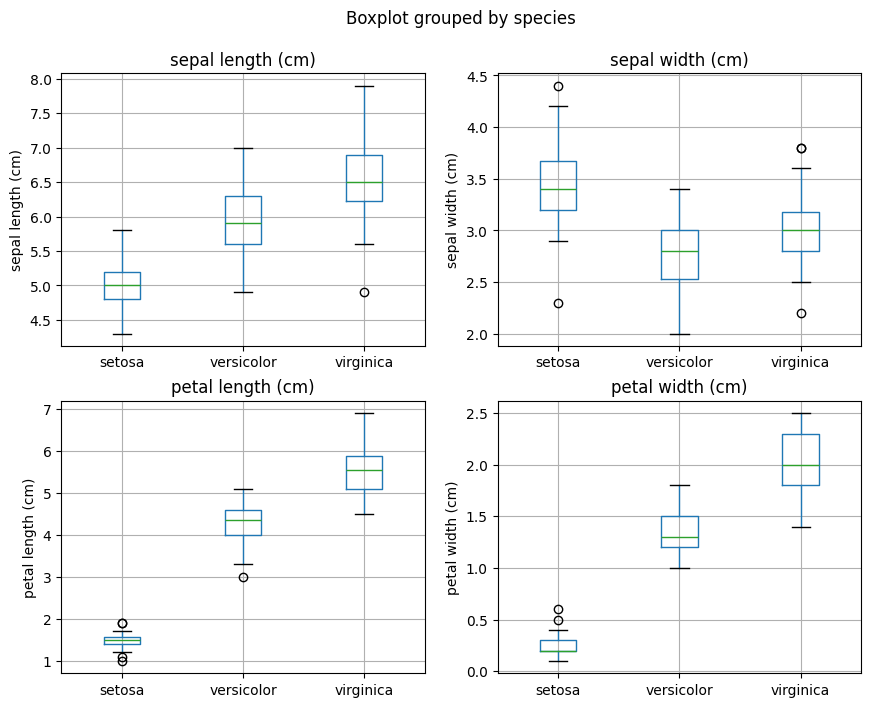

In [ ]:
# Utilisation de box-plot pour comparer les quartiles, moyenne et écart-type
# crée les sous graphiques de taille 2 par 2 avec une taille de 10 par 8
fig, axes = plt.subplots(2, 2, figsize=(10,8))
  
# axes lorsque tu fais   fig, axes = plt.subplots(2, 2, figsize=(10,8))
# [[axes[0,0], axes[0,1]],
#  [axes[1,0], axes[1,1]]]

# axes avec .flatten()
# [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]
axes = axes.flatten()

# zip c'est pour regrouper sous forme de tupple axes et nom de caractérisques  (sepal length , width ...)
for ax , col in zip(axes, iris.feature_names) :
    iris_df.boxplot(column = col , by='species' ,ax=ax)
    ax.set_title(col)
    
    # on configure les axes
    ax.set_xlabel('')
    ax.set_ylabel(col)

# affiche
plt.show()


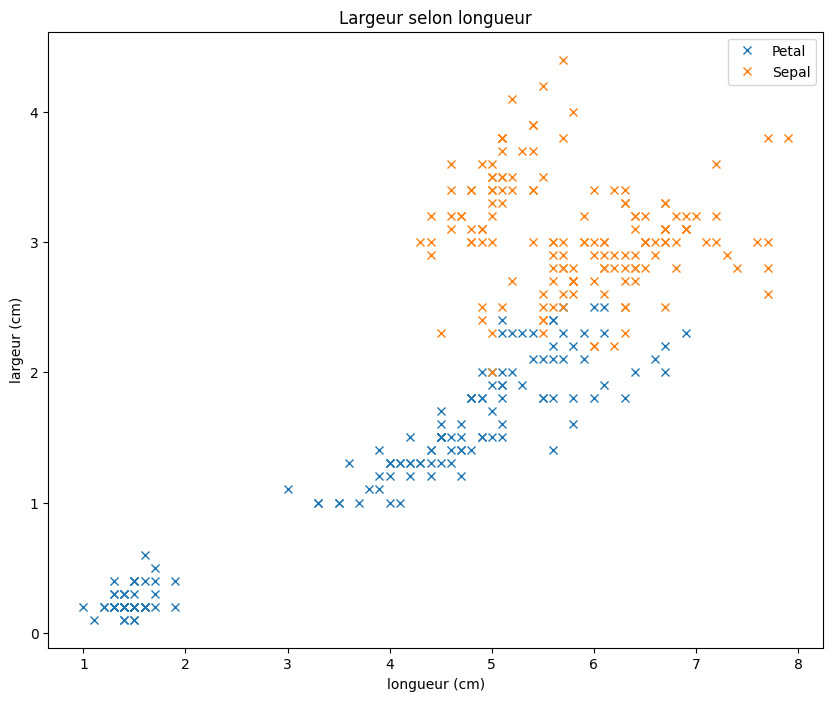

In [ ]:
# Nuage de points

# sublopts nous permet de rajouter dans un même tableau plusieurs graphe
fig, ax = plt.subplots(figsize=(10,8))

#  ajout des relations dans le graphique
# Le 'x' nous permet de faire que chaque donné à la forme de x 
# (peut prendre la valeur o pour donner la forme o)
ax.plot(iris_df['petal length (cm)'], iris_df['petal width (cm)'], 'x', label='Petal')
ax.plot(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], 'x', label='Sepal')

# on configure le nom
ax.set_title('Largeur selon longueur')

# on configure les axes
ax.set_xlabel('longueur (cm)')
ax.set_ylabel('largeur (cm)')

# ajout de la légend
ax.legend()

# on affiche
plt.show()

"""
# Partie 3 : Séparation features/target et split train/test

Avant d'entraîner un modèle, nous devons :
1. Séparer les caractéristiques (X) de la cible (y)
2. Diviser les données en ensembles d'entraînement et de test
"""

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation features (X) et target (y)
X = iris_df[iris.feature_names]  # Toutes les colonnes de caractéristiques
y = iris_df['target']            # La colonne cible

# Division en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Taille de l'ensemble de test: {X_test.shape[0]} échantillons")

# Vérification de la distribution des classes dans les splits
print("\nDistribution des classes dans y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribution des classes dans y_test:")
print(y_test.value_counts(normalize=True))

Taille de l'ensemble d'entraînement: 120 échantillons
Taille de l'ensemble de test: 30 échantillons

Distribution des classes dans y_train:
target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Distribution des classes dans y_test:
target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64
